In [7]:
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import os

In [24]:
house_price_sby =gpd.read_parquet(r"D:\ML5\final_projectt\house_price.parquet")
data_admin = gpd.read_file(r"C:\Users\techb\Downloads\RBI_50K_2023_Jawa Timur.x26272\RBI_50K_2023_Jawa Timur.shp")
admin_sby =data_admin[data_admin['NAMOBJ']=='Kota Surabaya']


In [26]:
house_price_sby.head(500)[['geometry','price']].explore()

In [27]:
# #make geodataframe
# df['geometry'] =df.apply(lambda x:Point(x['longitude'],x['latitude']),axis=1)
# gdf = gpd.GeoDataFrame(df, geometry ='geometry')
# gdf = gdf.set_crs(4326)


# #preprocessing
# gdf =gdf.drop_duplicates()
# house_price_sby = gdf.sjoin(admin_sby)
# house_price_sby['id'] = np.random.randint(10001,1000001, size=len(house_price_sby))
# house_price_sby.to_parquet(r"D:\ML5\final_projectt\house_price.parquet")



In [28]:
house_price_sby =house_price_sby.drop_duplicates('geometry')
# house_price_sby =house_price_sby.head(10)

In [29]:
house_price_sby

,price,bedroom,bathroom,building_area,land_area,latitude,longitude,geometry,index_right,NAMOBJ,...,WADMKD,WADMKK,WADMPR,WIADKC,WIADKK,WIADPR,WIADKD,SHAPE_Leng,SHAPE_Area,id
1,850000000,2,1,50,60,-7.319864,112.807145,POINT (112.80714 -7.31986),19,Kota Surabaya,...,None,Kota Surabaya,Jawa Timur,None,None,None,0,1.339154,0.027506,744059
2,500000000,2,2,50,60,-7.257472,112.752088,POINT (112.75209 -7.25747),19,Kota Surabaya,...,None,Kota Surabaya,Jawa Timur,None,None,None,0,1.339154,0.027506,21285
3,1300000000,2,2,50,74,-7.273916,112.659618,POINT (112.65962 -7.27392),19,Kota Surabaya,...,None,Kota Surabaya,Jawa Timur,None,None,None,0,1.339154,0.027506,513555
5,665000000,2,1,50,85,-7.269309,112.716719,POINT (112.71672 -7.26931),19,Kota Surabaya,...,None,Kota Surabaya,Jawa Timur,None,None,None,0,1.339154,0.027506,204915
6,775000000,2,1,50,60,-7.334239,112.799842,POINT (112.79984 -7.33424),19,Kota Surabaya,...,None,Kota Surabaya,Jawa Timur,None,None,None,0,1.339154,0.027506,238036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23418,10250000000,6,5,1000,597,-7.320421,112.756044,POINT (112.75604 -7.32042),19,Kota Surabaya,...,None,Kota Surabaya,Jawa Timur,None,None,None,0,1.339154,0.027506,82917
3259,1900000000,2,1,100,180,-7.295497,112.646775,POINT (112.64678 -7.2955),19,Kota Surabaya,...,None,Kota Surabaya,Jawa Timur,None,None,None,0,1.339154,0.027506,7624
3325,1200000000,3,3,100,67,-7.318181,112.781080,POINT (112.78108 -7.31818),19,Kota Surabaya,...,None,Kota Surabaya,Jawa Timur,None,None,None,0,1.339154,0.027506,7142
13596,2100000000,5,4,200,120,-7.265395,112.797133,POINT (112.79713 -7.26539),19,Kota Surabaya,...,None,Kota Surabaya,Jawa Timur,None,None,None,0,1.339154,0.027506,8619


## get image

In [30]:
import os
import leafmap
from PIL import Image
from samgeo import SamGeo, show_image, download_file, overlay_images, tms_to_geotiff

In [31]:
m = leafmap.Map(center=[-7.262436679684009,112.7501656099728], zoom=17, height="800px")
m.add_basemap("SATELLITE")
m

Map(center=[-7.262436679684009, 112.7501656099728], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [32]:
if m.user_roi_bounds() is not None:
    bbox = m.user_roi_bounds()


In [ ]:
# for i, row in house_price_sby_2.iterrows():
    #generate polygin buffer 1000m
    geom_buffer = gpd.GeoSeries(row['geometry']).set_crs(4326).to_crs(3393).buffer(1000,cap_style='square')
    geom_buffer = geom_buffer.to_crs(4326)
    bbox =list(geom_buffer[0] .bounds)

    #get image
    tiff_image_path = fr"D:\ML5\final_projectt\artifacts\tiff\{row['id']}.tiff"
    tms_to_geotiff(output=tiff_image_path, bbox=bbox, zoom=17, source="Satellite", overwrite=True)


    # After generating the TIFF image, convert it to PNG using Pillow
    png_image_path = fr"D:\ML5\final_projectt\artifacts\png\{row['id']}.png"


    # Open the TIFF file using Pillow
    with Image.open(tiff_image_path) as img:
        # Save the image as PNG
        img.save(png_image_path, format="PNG")
    print(f"Converted TIFF to PNG for {row['id']}. Saved at {png_image_path}")

    # break

In [ ]:
path_image = r'D:\ML5\final_projectt\artifacts\png'

list_image =[]
for file in os.listdir(path_image):
    list_image.append(int(file[:-4]))




In [ ]:
a = pd.read_parquet(r"D:\ML5\final_projectt\house_price.parquet")

In [ ]:
[i for i in house_price_sby['id'].unique() if i not in list_image]

[]

In [ ]:
image = "satellite.tif"
tms_to_geotiff(output=image, bbox=bbox, zoom=17, source="Satellite", overwrite=True)

Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to satellite.tif


In [ ]:
m.layers[-1].visible = False
m.add_raster(image, layer_name="Image")
m

In [ ]:
m.layers[-1].visible = False
m.add_raster(image, layer_name="Image")
m

## **Preprocessing**

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

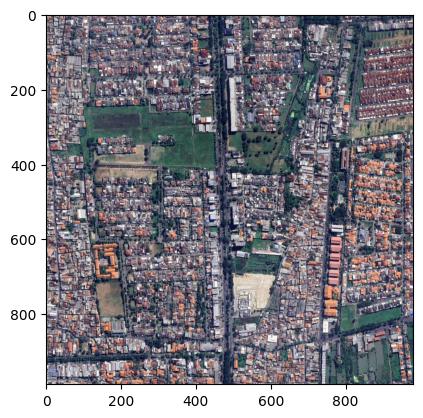

In [ ]:
#show sampel data
image = mpimg.imread(r'D:\ML5\final_projectt\artifacts\png\7142.png')
plt.imshow(image)

In [ ]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np


In [237]:
transaction_data=gpd.read_parquet(r"D:\ML5\final_projectt\house_price.parquet")
transaction_data["image_filename"]=transaction_data["id"].apply(lambda x:f"{x}.png")
# transaction_data =transaction_data.sample(300)

In [ ]:
# Select relevant numerical features


In [238]:
# Calculate Q1, Q3, and IQR
Q1 = np.percentile(transaction_data['price'].values.tolist(), 25)
Q3 = np.percentile(transaction_data['price'].values.tolist(), 75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

transaction_data = transaction_data[(transaction_data['price']<=upper_bound)&(transaction_data['price']>=lower_bound)]


In [239]:
transaction_data

,price,bedroom,bathroom,building_area,land_area,latitude,longitude,geometry,index_right,NAMOBJ,...,WADMKK,WADMPR,WIADKC,WIADKK,WIADPR,WIADKD,SHAPE_Leng,SHAPE_Area,id,image_filename
1,850000000,2,1,50,60,-7.319864,112.807145,POINT (112.80714 -7.31986),19,Kota Surabaya,...,Kota Surabaya,Jawa Timur,None,None,None,0,1.339154,0.027506,744059,744059.png
2,500000000,2,2,50,60,-7.257472,112.752088,POINT (112.75209 -7.25747),19,Kota Surabaya,...,Kota Surabaya,Jawa Timur,None,None,None,0,1.339154,0.027506,21285,21285.png
3,1300000000,2,2,50,74,-7.273916,112.659618,POINT (112.65962 -7.27392),19,Kota Surabaya,...,Kota Surabaya,Jawa Timur,None,None,None,0,1.339154,0.027506,513555,513555.png
5,665000000,2,1,50,85,-7.269309,112.716719,POINT (112.71672 -7.26931),19,Kota Surabaya,...,Kota Surabaya,Jawa Timur,None,None,None,0,1.339154,0.027506,204915,204915.png
6,775000000,2,1,50,60,-7.334239,112.799842,POINT (112.79984 -7.33424),19,Kota Surabaya,...,Kota Surabaya,Jawa Timur,None,None,None,0,1.339154,0.027506,238036,238036.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22903,6000000000,8,8,700,350,-7.296766,112.746080,POINT (112.74608 -7.29677),19,Kota Surabaya,...,Kota Surabaya,Jawa Timur,None,None,None,0,1.339154,0.027506,17885,17885.png
23339,5500000000,8,2,900,500,-7.279318,112.676636,POINT (112.67664 -7.27932),19,Kota Surabaya,...,Kota Surabaya,Jawa Timur,None,None,None,0,1.339154,0.027506,69923,69923.png
3259,1900000000,2,1,100,180,-7.295497,112.646775,POINT (112.64678 -7.2955),19,Kota Surabaya,...,Kota Surabaya,Jawa Timur,None,None,None,0,1.339154,0.027506,7624,7624.png
3325,1200000000,3,3,100,67,-7.318181,112.781080,POINT (112.78108 -7.31818),19,Kota Surabaya,...,Kota Surabaya,Jawa Timur,None,None,None,0,1.339154,0.027506,7142,7142.png


In [267]:
selected_features = ['bedroom', 'bathroom', 'building_area', 'land_area']
X_transaction = transaction_data[selected_features].fillna(0).values  # Convert to NumPy array
y_prices = transaction_data["price"].values.reshape(-1, 1)  


In [268]:



# Standardize transaction data
scaler = MinMaxScaler()
X_transaction = scaler.fit_transform(X_transaction)

# Extract house prices as labels

print(f"Transaction features shape: {X_transaction.shape}, Labels shape: {y_prices.shape}")


Transaction features shape: (1658, 4), Labels shape: (1658, 1)


In [ ]:
# y_prices = np.log(y_prices)

In [242]:
model =RandomForestRegressor(random_state=42)
model.fit(X_transaction, y_prices)

d:\ML5\final_projectt\env_mlclass\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [243]:
y_pred =model.predict(X_transaction)
ytrue = y_prices

In [244]:
y_prices

array([[ 850000000],
       [ 500000000],
       [1300000000],
       ...,
       [1900000000],
       [1200000000],
       [2100000000]], dtype=int64)

In [245]:
transaction_data.describe()

,price,bedroom,bathroom,building_area,land_area,latitude,longitude,index_right,LUASWH,TIPADM,WIADKD,SHAPE_Leng,SHAPE_Area,id
count,1.658000e+03,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.0,1.658000e+03,1658.0,1658.0,1.658000e+03,1.658000e+03,1658.000000
mean,2.192342e+09,3.285887,2.307600,150.797949,149.564536,-7.290523,112.737660,19.0,3.359248e+02,5.0,0.0,1.339154e+00,2.750637e-02,513729.658022
std,1.490991e+09,1.228924,1.055241,101.693112,93.834597,0.031439,0.052491,0.0,5.686057e-14,0.0,0.0,2.221116e-16,6.940987e-18,283839.707339
min,7.500000e+05,1.000000,1.000000,50.000000,27.000000,-7.350091,112.608519,19.0,3.359248e+02,5.0,0.0,1.339154e+00,2.750637e-02,7142.000000
25%,1.050000e+09,2.000000,2.000000,78.000000,86.250000,-7.316843,112.694769,19.0,3.359248e+02,5.0,0.0,1.339154e+00,2.750637e-02,277559.000000
50%,1.700000e+09,3.000000,2.000000,120.000000,120.000000,-7.291354,112.750111,19.0,3.359248e+02,5.0,0.0,1.339154e+00,2.750637e-02,524611.000000
75%,2.900000e+09,4.000000,3.000000,190.000000,192.000000,-7.264730,112.780871,19.0,3.359248e+02,5.0,0.0,1.339154e+00,2.750637e-02,757068.250000
max,7.200000e+09,9.000000,9.000000,900.000000,976.000000,-7.210886,112.821662,19.0,3.359248e+02,5.0,0.0,1.339154e+00,2.750637e-02,999095.000000


In [246]:

image_folder = r"D:\ML5\final_projectt\artifacts\png"



# Function to load and preprocess images
def load_images(image_filenames, img_size=(224, 224)):
    images = []
    matched_filenames = []

    for filename in image_filenames:
        img_path = os.path.join(image_folder, filename)
        if os.path.exists(img_path):  # Ensure the image file exists
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)
            img = img / 255.0  # Normalize
            images.append(img)
            matched_filenames.append(filename)

    return np.array(images), matched_filenames

# Get the list of filenames from the dataset
image_filenames = transaction_data["image_filename"].tolist()

# Load only images that exist in the dataset
satellite_images, valid_filenames = load_images(image_filenames)

print(f"Loaded {len(satellite_images)} images out of {len(image_filenames)} transaction records.")


Loaded 1658 images out of 1658 transaction records.


In [251]:
# Keep only transaction records where the image exists
filtered_data = transaction_data[transaction_data["image_filename"].isin(valid_filenames)].reset_index(drop=True)
print(f"Filtered dataset size: {filtered_data.shape}")


Filtered dataset size: (1658, 36)


In [270]:
from sklearn.model_selection import train_test_split

# Split into training (80%) and testing (20%)
X_train_img, X_test_img, X_train_tx, X_test_tx, y_train, y_test = train_test_split(
    satellite_images, X_transaction, y_prices, test_size=0.2, random_state=42
)

print(f"Training set: {X_train_img.shape}, {X_train_tx.shape}, {y_train.shape}")
print(f"Testing set: {X_test_img.shape}, {X_test_tx.shape}, {y_test.shape}")


Training set: (1326, 224, 224, 3), (1326, 4), (1326, 1)
Testing set: (332, 224, 224, 3), (332, 4), (332, 1)


In [282]:
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Concatenate, GlobalAveragePooling2D, Dropout

# Define input shapes
input_shape_img = (224, 224, 3)  # Image input shape
input_shape_tx = (X_train_tx.shape[1],)  # Transaction data input shape

# Image Input (ResNet Feature Extraction)
image_input = Input(shape=input_shape_img, name="Image_Input")

# Initialize ResNet50 without the top layer
# resnet_base = ResNet50(weights="imagenet", include_top=False, input_shape=input_shape_img)
vgg16 =VGG16(weights="imagenet", include_top=False, input_shape=input_shape_img)
vgg16.trainable = False  # Freeze ResNet50 layers during initial training

# Extract features using ResNet50
resnet_features = vgg16(image_input)
resnet_output = GlobalAveragePooling2D()(resnet_features)
resnet_output = Dense(256, activation='relu')(resnet_output)
resnet_output = Dense(128, activation='relu')(resnet_output)
resnet_output = Dense(64, activation='relu')(resnet_output) 
resnet_output = Dense(32, activation='relu')(resnet_output) 
resnet_output = Dense(10, activation='relu')(resnet_output) 

#  Transaction Data Input
transaction_input = Input(shape=input_shape_tx, name="Transaction_Input")

#  Merge Image Features & Transaction Data
merged_features = Concatenate()([resnet_output, transaction_input])

# 🔄 Fully Connected Layers for Regression
x = Dense(256, activation='relu')(merged_features)
x = Dropout(0.5)(x)  # Adding dropout with 50% dropout rate
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)  # Adding dropout with 30% dropout rate
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)  # Adding dropout with 20% dropout rate
x = Dense(32, activation='relu')(x)
output = Dense(1, activation='linear', name="Price_Output")(x)  # Ensure this is a Keras Tensor

# Define the final model
model = Model(inputs=[image_input, transaction_input], outputs=output)

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Model Summary
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 143s 2us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Image_Input         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 7, 7, 512) │ 14,714,688 │ Image_Input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 256)       │    131,328 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 128)       │     32,896 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 64)        │      8,256 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 32)        │      2,080 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 10)        │        330 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Transaction_Input   │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 14)        │          0 │ dense_16[0][0],   │
│ (Concatenate)       │                   │            │ Transaction_Inpu… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 256)       │      3,840 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 128)       │     32,896 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_18[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 64)        │      8,256 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ dense_19[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 32)        │      2,080 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Price_Output        │ (None, 1)         │         33 │ dense_20[0][0]    │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,936,683 (56.98 MB)

 Trainable params: 221,995 (867.17 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [283]:
# Train the model using the matched dataset
model.fit(
    [X_train_img, X_train_tx], y_train, 
    validation_data=([X_test_img, X_test_tx], y_test),
    epochs=10, batch_size=50
)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 334s 12s/step - loss: 7677339940945920000.0000 - mae: 2295428864.0000 - val_loss: 6087476363751587840.0000 - val_mae: 2030267136.0000
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 314s 12s/step - loss: 7134721057033814016.0000 - mae: 2214827008.0000 - val_loss: 6086487353042403328.0000 - val_mae: 2030023936.0000
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 333s 12s/step - loss: 7298923223037509632.0000 - mae: 2231809792.0000 - val_loss: 5982774269484990464.0000 - val_mae: 2004435328.0000
Epoch 4/10
 7/27 ━━━━━━━━━━━━━━━━━━━━ 3:06 9s/step - loss: 6337494862547386368.0000 - mae: 2080875136.0000

KeyboardInterrupt: 

In [284]:
scaler

MinMaxScaler()

In [263]:
len(X_train_img[0])

224

In [259]:
model

<Functional name=functional_20, built=True>

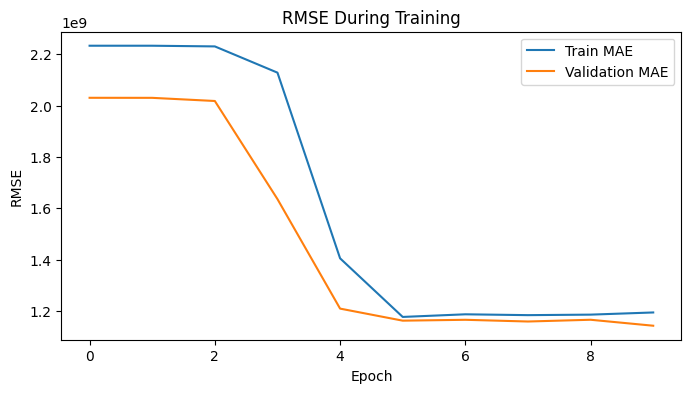

In [273]:
import matplotlib.pyplot as plt

# Plotting RMSE
plt.figure(figsize=(8, 4))

plt.plot(model.history.history['mae'], label='Train MAE')
plt.plot(model.history.history['val_mae'], label='Validation MAE')
plt.title('RMSE During Training')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()


In [275]:
import pickle

In [276]:
# Save the scaler to a pickle file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [277]:
# Save the scaler to a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

## **Hpyerparameter Tuning**

In [257]:
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
import keras_tuner as kt

def build_model(hp):
    # Image input processing
    input_shape_img = (224, 224, 3)
    image_input = Input(shape=input_shape_img, name="Image_Input")
    resnet_base = ResNet50(include_top=False, input_shape=input_shape_img, weights='imagenet')
    resnet_base.trainable = False
    x = GlobalAveragePooling2D()(resnet_base(image_input))
    
    # Tuning the number of units in the first post-ResNet dense layer
    for i in range(hp.Int('num_dense_layers', 1, 3)):
        x = Dense(
            units=hp.Int('units_' + str(i), min_value=32, max_value=256, step=32),
            activation='relu'
        )(x)

    # Transaction input processing
    input_shape_tx = (X_train_tx.shape[1],)
    transaction_input = Input(shape=input_shape_tx, name="Transaction_Input")
    
    # Concatenate both inputs
    concatenated = Concatenate()([x, transaction_input])
    
    # Additional dense layers post-concatenation
    y = concatenated
    for i in range(hp.Int('num_concat_dense_layers', 1, 3)):
        y = Dense(
            units=hp.Int('concat_units_' + str(i), min_value=32, max_value=256, step=32),
            activation='relu'
        )(y)
    
    output = Dense(1, activation='linear')(y)
    model = Model(inputs=[image_input, transaction_input], outputs=output)
    
    # Compiling the model
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )
    return model


In [279]:
tuner = kt.Hyperband(
    build_model,
    objective='val_mae',
    max_epochs=10,
    factor=3,
    directory='keras_tuner_dir',
    project_name='house_price_tuning'
)

# Early stopping to avoid overfitting
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Perform the hyperparameter tuning
tuner.search([X_train_img, X_train_tx], y_train,
             epochs=10,
             validation_data=([X_test_img, X_test_tx], y_test),
             callbacks=[stop_early])


Trial 30 Complete [00h 17m 30s]
val_mae: 1055323264.0

Best val_mae So Far: 1029228352.0
Total elapsed time: 04h 34m 05s


In [280]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Optional: Retrain the model if necessary
best_model.fit([X_train_img, X_train_tx], y_train, epochs=10, validation_split=0.2)

# Evaluate the best model
eval_result = best_model.evaluate([X_test_img, X_test_tx], y_test)
print('Optimal model metrics:', eval_result)
print('Optimal model hyperparameters:', best_hps.values)


Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - loss: 6995467909375983616.0000 - mae: 2207950336.0000 - val_loss: 8216636650474700800.0000 - val_mae: 2374934016.0000
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - loss: 7503421390687567872.0000 - mae: 2248872448.0000 - val_loss: 8216335934044504064.0000 - val_mae: 2374870528.0000
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - loss: 7251115907705995264.0000 - mae: 2236300032.0000 - val_loss: 8211458500463689728.0000 - val_mae: 2373848064.0000
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - loss: 6631163423210078208.0000 - mae: 2141614464.0000 - val_loss: 8172760638968299520.0000 - val_mae: 2365715456.0000
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - loss: 6688958702168309760.0000 - mae: 2123916032.0000 - val_loss: 7982966240316489728.0000 - val_mae: 2325421568.0000
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - loss: 6334415130477985792.0000 - mae: 2078681088.0000 - val_loss: 7338076282346799104.0000 - val_m